<a href="https://colab.research.google.com/github/Prince142001/scikit-learn-iris-dataset-beginner/blob/main/scikit_learn_iris_dataset_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Show the keys (what is inside the dataset)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df["target"]=iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);

X_train.shape, X_test.shape

((120, 4), (30, 4))

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

accuracy=model.score(X_test, y_test)

accuracy

1.0

In [10]:
import numpy as np

new_flower=np.array([[5.0, 3.4, 1.6, 0.3]])

prediction=model.predict(new_flower)

prediction

array([0])

In [12]:
new_flower2=np.array([[6.5, 2.8, 4.6, 1.5]])

prediction = model.predict(new_flower2)

prediction

array([1])

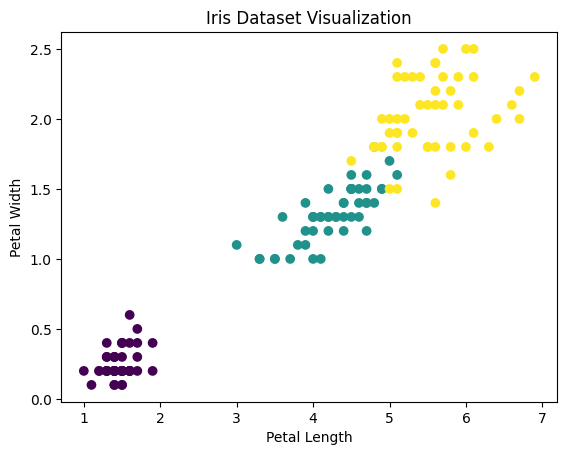

In [13]:
import matplotlib.pyplot as plt

plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Dataset Visualization")
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_accuracy = knn.score(X_test, y_test)

knn_accuracy

1.0

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
acc1 = log_reg.score(X_test, y_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
acc2 = knn.score(X_test, y_test)

# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
acc3 = tree.score(X_test, y_test)

acc1, acc2, acc3

(1.0, 1.0, 1.0)

In [16]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [17]:
import joblib

joblib.dump(model, "iris_model.pkl")


['iris_model.pkl']

In [18]:
loaded_model = joblib.load("iris_model.pkl")

loaded_model.predict([[5.1, 3.5, 1.4, 0.2]])


array([0])